<a href="https://colab.research.google.com/github/sriyadd/Online-Retail-Analysis/blob/main/Code_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl
import pandas as pd
from matplotlib import pyplot as plt
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
pd.read_excel('Online Retail.xlsx')

--2025-02-26 20:08:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx      [   <=>              ]  22.62M  41.9MB/s    in 0.5s    

2025-02-26 20:08:15 (41.9 MB/s) - ‘Online Retail.xlsx’ saved [23715344]



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [2]:
df1 = pd.read_excel('Online Retail.xlsx', dtype={'InvoiceNo': 'string', 'StockCode': 'string', 'Description': 'string', 'Country': 'string'})
df1.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [3]:
df1.shape

(541909, 8)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  string        
 1   StockCode    541909 non-null  string        
 2   Description  540455 non-null  string        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(1), string(4)
memory usage: 33.1 MB


# Data Cleaning

Handle Missing Values

In [5]:
df1.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
#print the N/A rows and columns

df1[df1.Description.isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,<NA>,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,<NA>,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,<NA>,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,<NA>,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,<NA>,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,<NA>,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,<NA>,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [7]:
df1[df1.StockCode == '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,2010-12-01 09:41:00,4.25,15311.0,United Kingdom
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,2010-12-03 12:08:00,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,2010-12-03 14:27:00,11.02,NaN,United Kingdom
7203,537011,22139,<NA>,-5,2010-12-03 15:38:00,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 13:50:00,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,2011-12-08 16:30:00,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,2011-12-09 09:38:00,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,2011-12-09 10:26:00,10.79,NaN,United Kingdom


 Use Mode to replace Description N/A for each StockCode

In [8]:
df1[df1.StockCode == '22139'].Description.mode()

,Description
0,RETROSPOT TEA SET CERAMIC 11 PC


In [9]:
# Get the StockCode and Description columns and get their total value counts

# Printing the count, most frequent Description of a particular StockCode and use Mode to replace N/A, sort by ascending

df1[["StockCode", "Description"]].value_counts().reset_index()

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [10]:
# Call this dataframe most frequent description

most_freq = df1[["StockCode", "Description"]].value_counts().reset_index()
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4787,35954,counted,1
4788,35954,check,1
4789,35923,check,1
4790,35915C,damaged,1


In [11]:
# Check number of records for a particular StockCode

most_freq[most_freq.StockCode == '85123A'].head(1)



,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302


In [12]:
#for StockCode 85123A, considering the first row as it's valid Description
most_freq = most_freq.groupby('StockCode').head(1)
most_freq

,StockCode,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,22423,REGENCY CAKESTAND 3 TIER,2200
2,85099B,JUMBO BAG RED RETROSPOT,2159
3,47566,PARTY BUNTING,1727
4,20725,LUNCH BAG RED RETROSPOT,1638
...,...,...,...
4767,35600A,Found by jackie,1
4769,35597B,BLACKCHRISTMAS TREE 30CM,1
4770,35832,WOOLLY HAT SOCK GLOVE ADVENT STRING,1
4777,37330,BIG POLKADOT MUG,1


Merge original dataframe on StockCode with most frequent Description, hence replacing N/As

In [13]:
most_freq_columns = ["StockCode", "freq_Description", "count"]

df2 = df1.merge(most_freq, on='StockCode', how='left')
df2.head()


,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [14]:
df2['Description_x'] = df2['Description_y']
df2.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN,328.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER,293.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,473.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,449.0


In [15]:
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,112
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
Description_y,112
count,112


In [16]:
# Drop N/A for Description

df2.dropna(subset = ["Description_x"], inplace=True)
df2.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0
Description_y,0
count,0


In [17]:
# Drop the extra columns after merging

df2.drop(columns=['Description_y','count'], inplace=True)
df2.head()

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [18]:
# Rename Description_x as Description

df2.rename(columns={'Description_x': 'Description'}, inplace=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
df2.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541797.000000,541797,541797.000000,406829.000000
mean,9.555919,2011-07-04 14:06:48.671255296,4.612067,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:36:00,1.250000,13953.000000
50%,3.000000,2011-07-20 08:59:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:41:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.103428,NaN,96.769831,1713.600303


Negative values for Quantity and UnitPrice can be observed, which is not typical.

In [20]:
df2[df2.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Possibly refunds, can discuss based on business needs to keep these values but for my analysis will be dropping them

In [21]:
df2[df2.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [22]:
# Create new dataframe without considering the negative values

df3 = df2[(df2.UnitPrice>0) & (df2.Quantity>0)]

In [23]:
df3.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,530104.000000,530104,530104.000000,397884.000000
mean,10.542037,2011-07-04 20:16:05.225087744,3.907625,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:22:00,1.250000,13969.000000
50%,3.000000,2011-07-20 12:58:00,2.080000,15159.000000
75%,10.000000,2011-10-19 12:39:00,4.130000,16795.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,155.524124,NaN,35.915681,1713.141560


In [24]:
# Findingvalues below which 99.99% of Quantity values fall

df3.Quantity.quantile(0.9999)

1439.8763999990188

In [25]:
df3[df3.Quantity>1500]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
25920,538420,17096,ASSORTED LAQUERED INCENSE HOLDERS,1728,2010-12-12 12:03:00,0.17,12875.0,United Kingdom
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029.0,United Kingdom
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2011-01-11 12:55:00,2.55,15749.0,United Kingdom
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2011-01-11 12:55:00,1.85,15749.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333.0,United Kingdom
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029.0,United Kingdom


# Feautre Engineering : Creating New Columns

Sales Analysis

In [26]:
df4 = df3.copy()

df4['TotalSales'] = df4['Quantity'] * df4['UnitPrice']
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [27]:
# Monthly Sales Data

df4['Month'] = df4['InvoiceDate'].dt.month
df4.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
306471,563755,21982,PACK OF 12 SUKI TISSUES,24,2011-08-19 10:58:00,0.29,17612.0,United Kingdom,6.96,8
540732,581492,22104,MIRROR MOSAIC CANDLE PLATE,4,2011-12-09 10:03:00,1.63,NaN,United Kingdom,6.52,12
185145,552735,22439,6 ROCKET BALLOONS,24,2011-05-11 10:49:00,0.65,17428.0,United Kingdom,15.60,5
541205,581494,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 10:13:00,3.75,12518.0,Germany,15.00,12
450966,575177,23201,JUMBO BAG ALPHABET,2,2011-11-08 18:41:00,4.13,NaN,United Kingdom,8.26,11


# Visualization & EDA

# Plot Monthly Sales

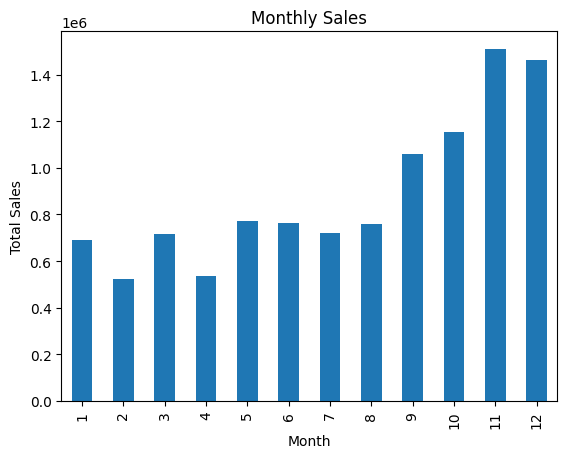

In [28]:
 # Calculate total sales for each month

 monthly_sales = df4.groupby("Month")["TotalSales"].sum()
 monthly_sales.plot(kind="bar", title="Monthly Sales")
 plt.xlabel("Month")
 plt.ylabel("Total Sales")
 plt.show()

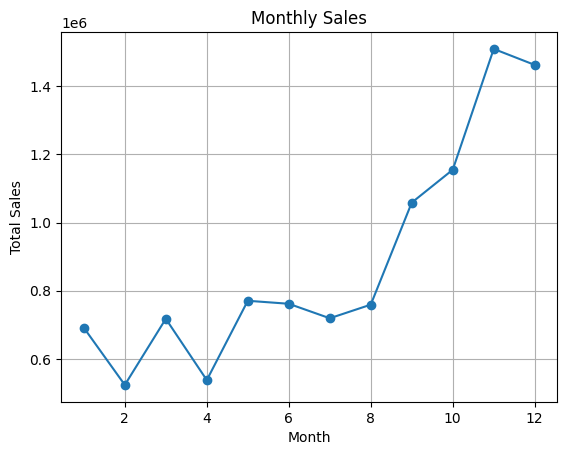

In [29]:
# Line Chart
monthly_sales.plot(kind="line", title="Monthly Sales", marker='o')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

Insights: Total Sales started to rise from August having peaked in November. This is likely due to the holiday season at the end of the year in UK.

Top 5 Countries

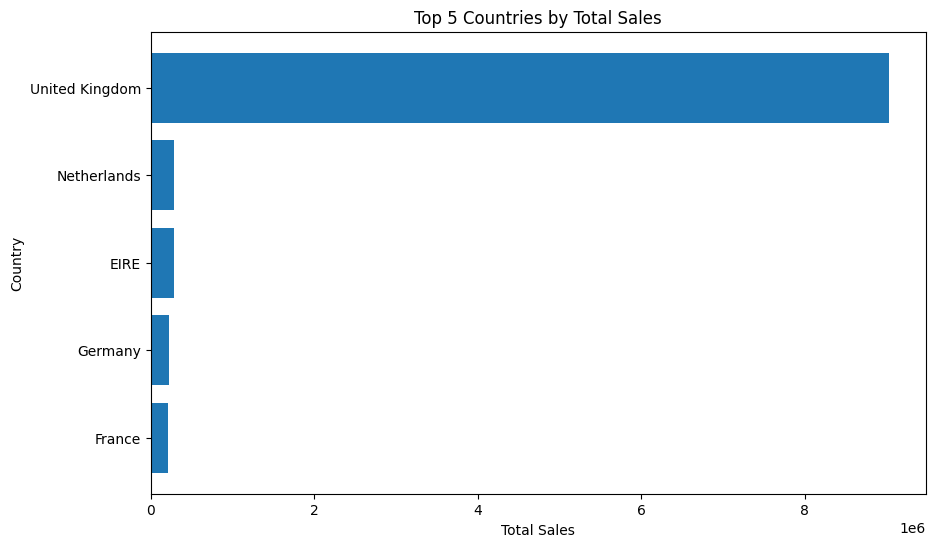

In [30]:
# Plot horizontal bar chart for top 5 countries by total sales

import matplotlib.pyplot as plt

# Calculate total sales for each country
country_sales = df4.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(5)

# Get the top 5 countries
top5_countries = country_sales.head(5)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top5_countries.index, top5_countries.values)
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show highest sales at the top
plt.show()


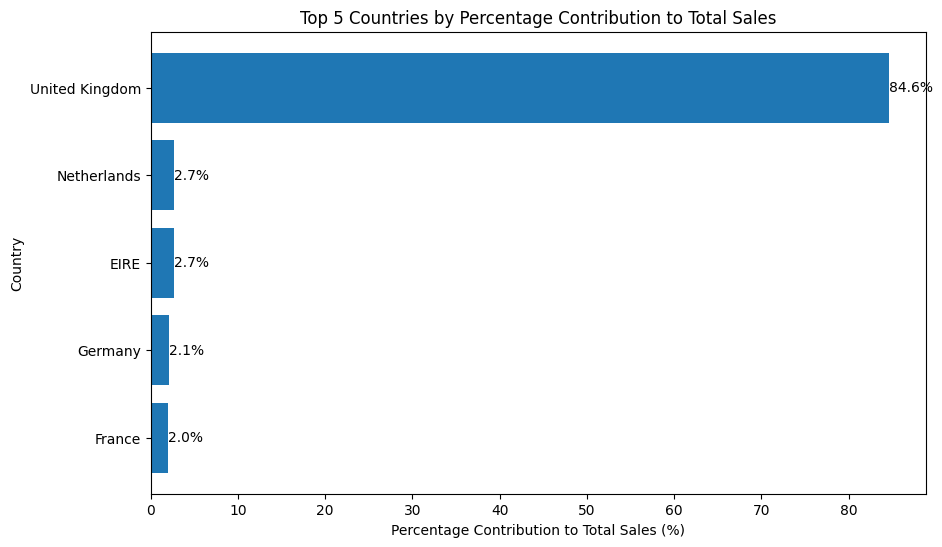

In [32]:
# Plot the same chart as above but this time use percentage contribution. show % on the bar

import matplotlib.pyplot as plt
# Calculate total sales for each country
country_sales = df4.groupby('Country')['TotalSales'].sum()

# Calculate percentage contribution
total_sales = country_sales.sum()
country_percentages = (country_sales / total_sales) * 100

# Sort by percentage contribution in descending order and get the top 5
top5_countries = country_percentages.sort_values(ascending=False).head(5)

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(top5_countries.index, top5_countries.values)
plt.xlabel('Percentage Contribution to Total Sales (%)')
plt.ylabel('Country')
plt.title('Top 5 Countries by Percentage Contribution to Total Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show highest contribution at the top

# Add percentage labels to the bars
for bar, percentage in zip(bars, top5_countries.values):
  plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.1f}%',
            va='center', ha='left', color='black')

plt.show()


Product Wise Sales

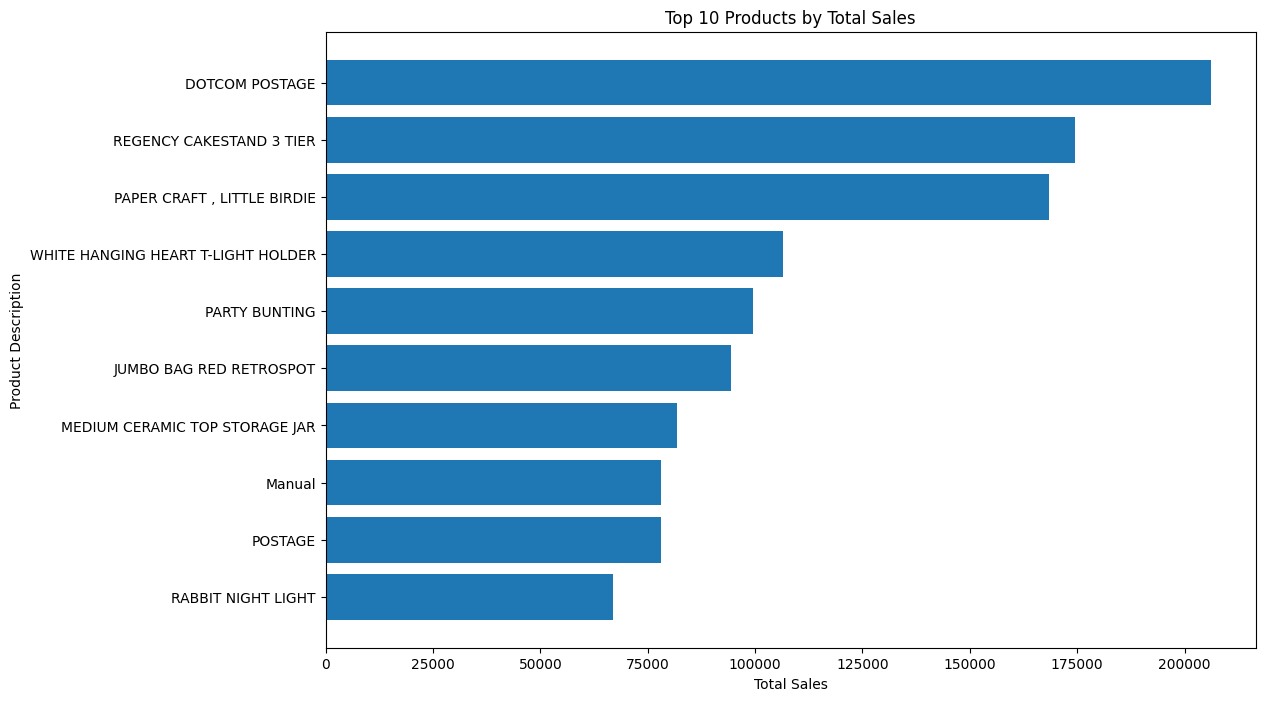

In [33]:
#  Plot for top product wise sales

import matplotlib.pyplot as plt
# Calculate total sales for each product
product_sales = df4.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)

# Create the horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(product_sales.index, product_sales.values)
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.title('Top 10 Products by Total Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show highest sales at the top
plt.show()


DOTCOM Postage is the top selling product, which needs further analysis as the product type is unsure.

# RFM Analysis
marketing strategy using customer data to segment customers into groups
  
R - Recency : how recent
F - Frequency : how often
M - Monetary : how much

In [34]:
# Calculating Recency

current_dt = df4["InvoiceDate"].max() + pd.Timedelta(days=1)
current_dt

Timestamp('2011-12-10 12:50:00')

In [40]:
rfm = df4.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_dt - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSales': 'sum'
})
rfm

,InvoiceDate,InvoiceNo,TotalSales
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


# Customer Segmentation


In [41]:
#Rename columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalSales': 'Monetary'}, inplace=True)

rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [43]:
# Segment Customers based on RFM

rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1]) #the most recent customer will get a higher score; marketing strategy
rfm['F_Segment'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])
rfm['RFM_score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1)
rfm

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,4,6
12347.0,2,182,4310.00,4,4,4,12
12348.0,75,31,1797.24,2,2,4,8
12349.0,19,73,1757.55,3,3,4,10
12350.0,310,17,334.40,1,1,2,4
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,3
18281.0,181,7,80.82,1,1,1,3
18282.0,8,12,178.05,4,1,1,6


Diving customers into tiers of 1,2,3,4
The higher the tier, the valuable the customer

In [46]:
# Sorting the values by RFM Scores

rfm.sort_values('RFM_score', ascending=False)

,Recency,Frequency,Monetary,R_Segment,F_Segment,M_Segment,RFM_score
CustomerID,,,,,,,
18102.0,1,431,259657.30,4,4,4,12
14367.0,8,524,9261.52,4,4,4,12
17625.0,18,315,2047.00,4,4,4,12
15484.0,1,188,3594.31,4,4,4,12
14395.0,2,350,3507.71,4,4,4,12
...,...,...,...,...,...,...,...
13133.0,274,7,109.80,1,1,1,3
15578.0,162,13,127.10,1,1,1,3
13144.0,333,3,110.95,1,1,1,3


# Customer Churn Analysis


In [47]:
 df4.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [49]:
# Create a basket matrix for association rule mining

customer_last_purchase = df4.groupby('CustomerID')['InvoiceDate'].max()
customer_last_purchase.head(5)

,InvoiceDate
CustomerID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00


In [51]:
current_dt

Timestamp('2011-12-10 12:50:00')

In [52]:
customer_last_purchase = (current_dt - customer_last_purchase).dt.days
customer_last_purchase.head(5) # gives Recency value

,InvoiceDate
CustomerID,
12346.0,326
12347.0,2
12348.0,75
12349.0,19
12350.0,310


Churn Threshold

In [53]:
churn_threshold = 90
churned_customers = customer_last_purchase[customer_last_purchase > churn_threshold]
churned_customers.head(5)

,InvoiceDate
CustomerID,
12346.0,326
12350.0,310
12353.0,204
12354.0,232
12355.0,214


Customer 12346's last purchase was 326 days ago, 12350's was 310 days ago etc

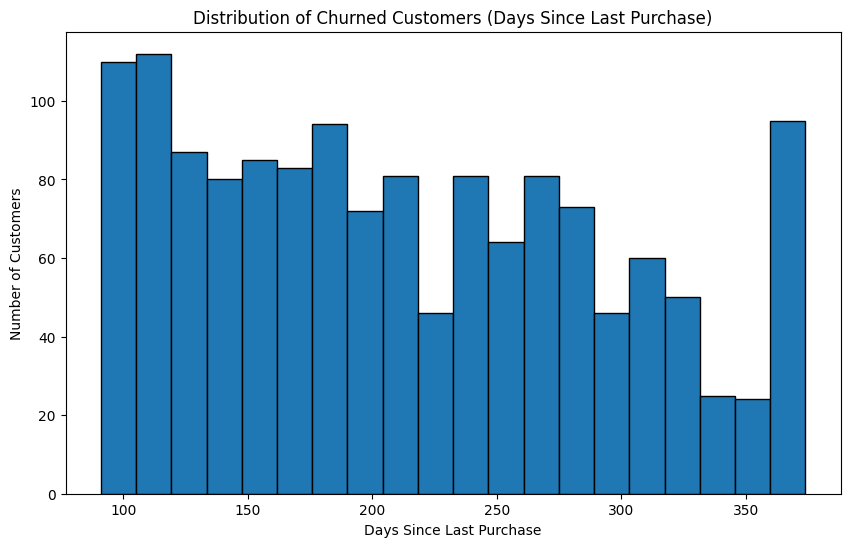

In [54]:
# prompt: plot a histogram for the chured_customers

import matplotlib.pyplot as plt
# Assuming 'churned_customers' is a pandas Series as calculated in the provided code.
plt.figure(figsize=(10, 6))
plt.hist(churned_customers, bins=20, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.title('Distribution of Churned Customers (Days Since Last Purchase)')
plt.show()


Number of Chruned Customer: 1449


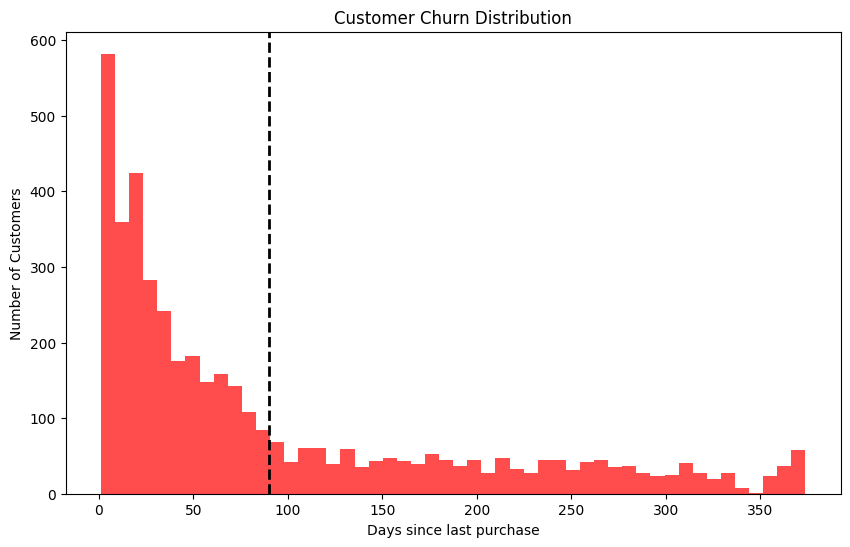

In [55]:
print("Number of Chruned Customer:", len(churned_customers))
plt.figure(figsize=(10, 6))
plt.hist(customer_last_purchase, bins=50, color = 'red', alpha=0.7)
plt.axvline(churn_threshold, color='black', linestyle='dashed', linewidth=2)
plt.xlabel('Days since last purchase')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Distribution')
plt.show()